In [1]:
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2
import argparse
import matplotlib.pyplot as plt
import numpy as np
import image_dehazer

ModuleNotFoundError: No module named 'image_dehazer'

In [29]:
image_num = 0
imageA_path = f'Restoration\\Trian\\Denoised\\Denoised_{image_num}.jpg'
imageB_path = f'Restoration\\Trian\\Noised\\Noised_{image_num}.jpg'
imageA = cv2.imread(imageA_path)
imageB = cv2.imread(imageB_path)
dehaze_image = image_dehazer.remove_haze(imageB) 
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
score, diff = compare_ssim(grayA, grayB, full=True)
r_N2D = psnr(imageA, imageB)
r_D2D = psnr(imageA, dehaze_image)
# full=True: 이미지 전체에 대해서 구조비교를 수행한다.
diff = (diff * 255).astype('uint8')
print(f'SSIM: {score:.6f}')
print(f'psnr noise & denoise : {r_N2D}')
print(f'psnr dehaze & denoise : {r_D2D}')

thresh = cv2.threshold(
                 diff, 0, 200, 
                 cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
             )[1]

SSIM: 0.656575
psnr: 20.802714091650305


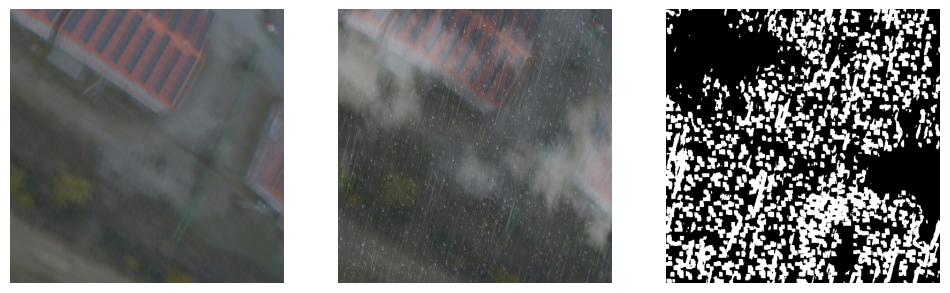

In [30]:
plt.figure(figsize=(12, 6))
show_imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2RGB)
show_imageB = cv2.cvtColor(imageB, cv2.COLOR_BGR2RGB)
plt.subplot(131), plt.axis('off'), plt.imshow(show_imageA)
plt.subplot(132), plt.axis('off'), plt.imshow(show_imageB)
plt.subplot(133), plt.axis('off'), plt.imshow(thresh, cmap='gray')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
show_dehaze = cv2.cvtColor(dehaze_image, cv2.COLOR_BGR2RGB)

plt.subplot(131), plt.axis('off'), plt.imshow(show_imageA)
plt.subplot(132), plt.axis('off'), plt.imshow(show_dehaze)
plt.subplot(133), plt.axis('off'), plt.imshow(show_imageB)
plt.show()

In [ ]:
class LayerActivations:
    features = []
    def __init__(self, model, layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn) ------ ①

    def hook_fn(self, module, input, output):
        self.features = output.detach().numpy()

    def remove(self): ------ hook 삭제
        self.hook.remove()